In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


First check missing values

# Missing Data

In [9]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

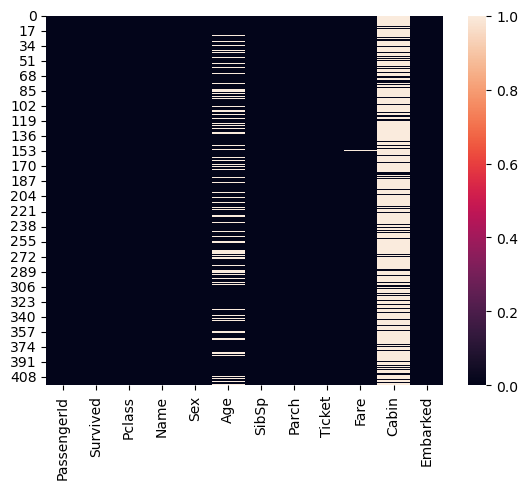

In [10]:
sns.heatmap(df.isnull() )

<Axes: >

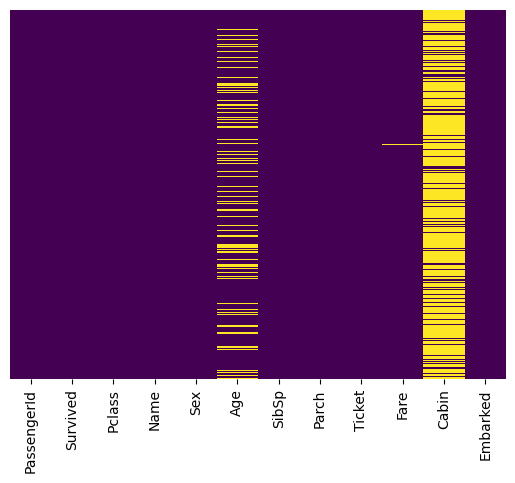

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap = "viridis")

<Axes: xlabel='Embarked', ylabel='count'>

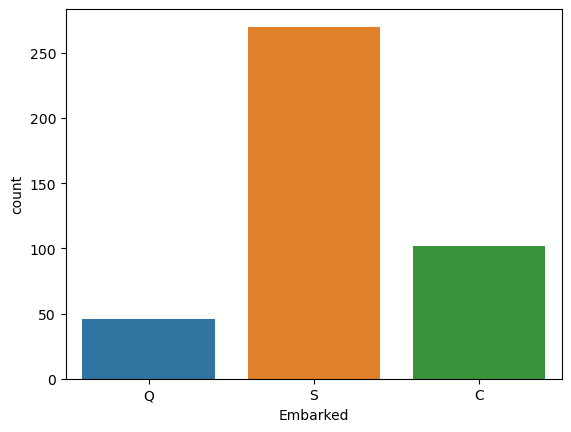

In [4]:
sns.countplot(x = 'Embarked', data = df)

<Axes: xlabel='Survived', ylabel='count'>

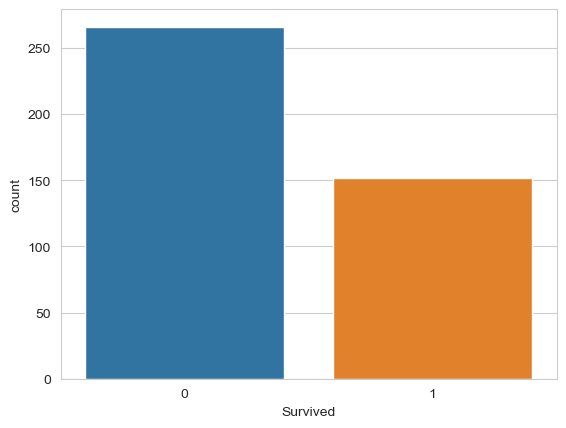

In [16]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df)

<Axes: xlabel='Survived', ylabel='count'>

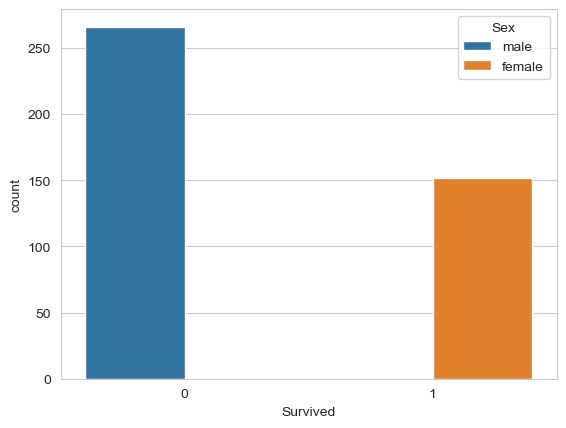

In [22]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Sex', data = df,)

<Axes: xlabel='Survived', ylabel='count'>

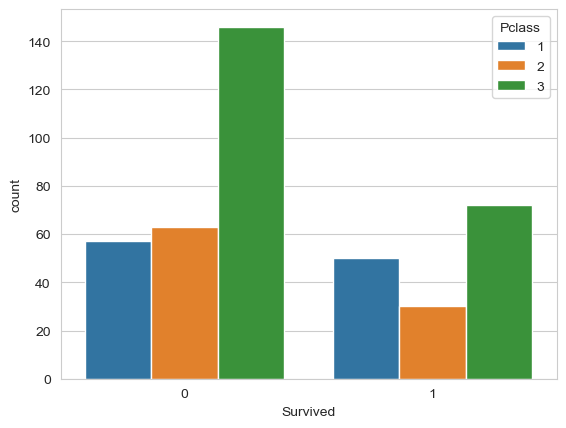

In [23]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Pclass', data = df,)

C:\Users\Hammad Alamgir\AppData\Local\Temp\ipykernel_6920\450329021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(), kde = False, bins = 40)


<Axes: xlabel='Age'>

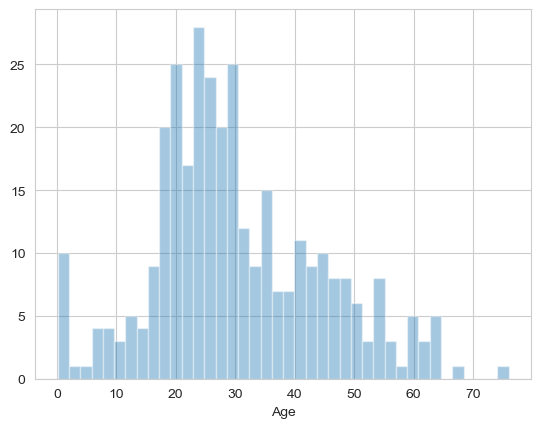

In [29]:
sns.distplot(df['Age'].dropna(), kde = False, bins = 40)

<Axes: >

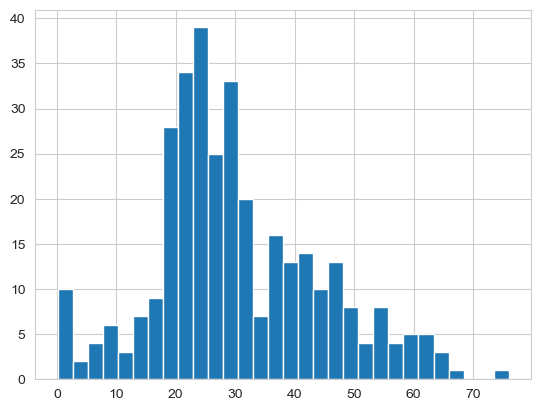

In [31]:
df['Age'].hist(bins = 30)

<Axes: xlabel='SibSp', ylabel='count'>

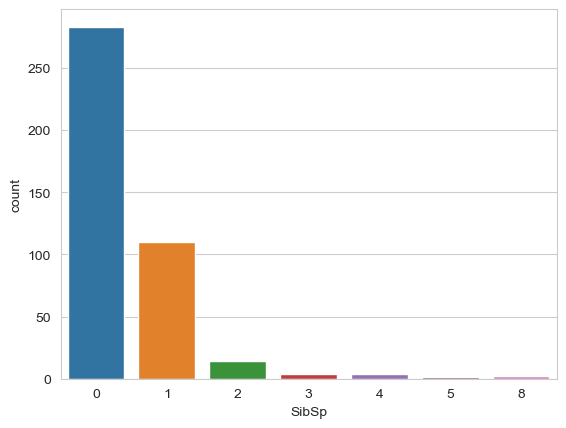

In [32]:
sns.countplot(x = 'SibSp', data = df)

<Axes: >

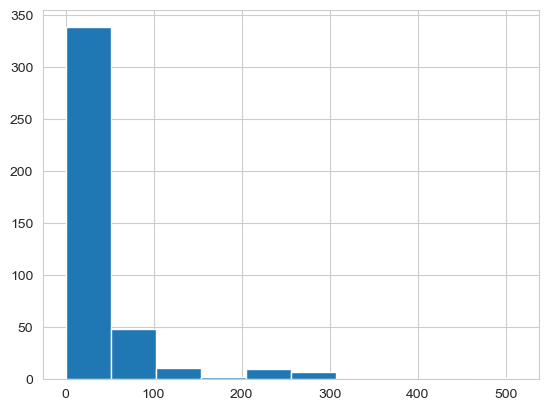

In [34]:
df['Fare'].hist()

# Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

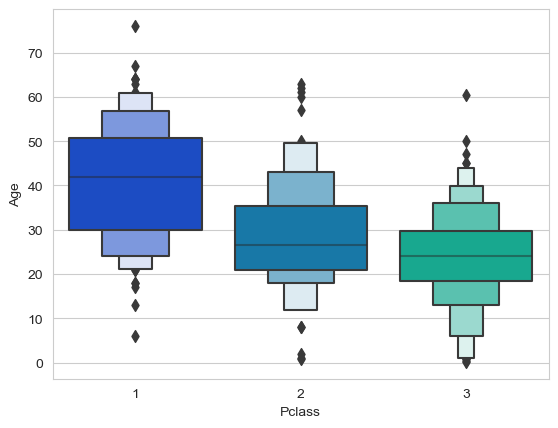

In [36]:
sns.boxenplot(x = 'Pclass', y = 'Age', data = df, palette = 'winter')

In [37]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        elif Pclass == 3:
            return 24
    else:
        return Age
    

In [38]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis= 1)

<Axes: >

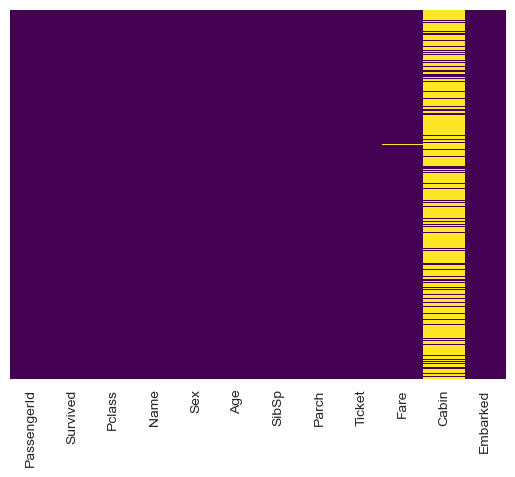

In [39]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap = "viridis")

In [40]:
df.drop('Cabin', axis = 1, inplace= True)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<Axes: >

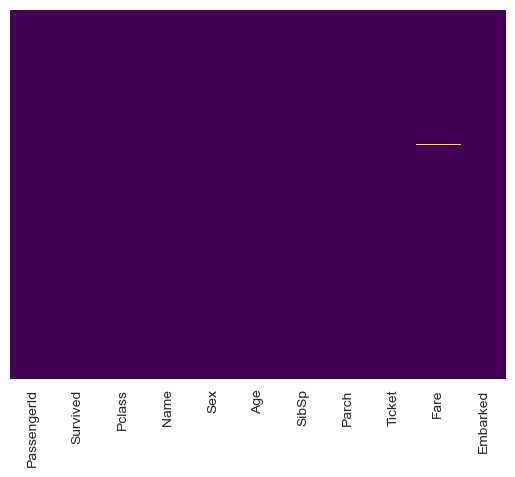

In [42]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap = "viridis")

In [43]:
df.dropna(inplace= True)

<Axes: >

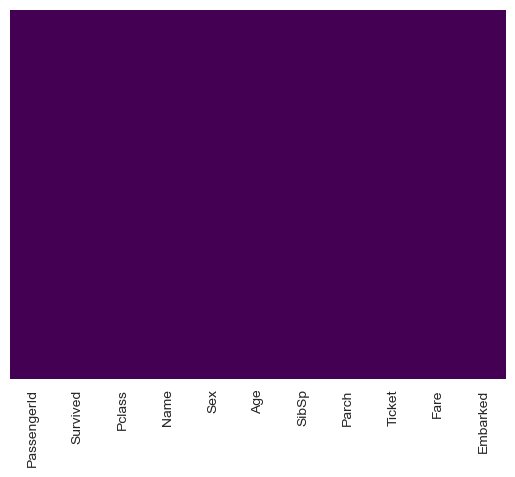

In [44]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap = "viridis")

# Converting Categorical Features

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [50]:
pd.get_dummies(df['Embarked'],).head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [56]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)